<a href="https://colab.research.google.com/github/siyuan652/Autonomous-Driving-System-with-Traffic-Light-Detection/blob/main/traffic_light_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import os
import glob
from IPython.display import Image, display

In [2]:
# check access to GPU
!nvidia-smi

Sat Dec 23 05:56:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.8 MB/s eta 0:00:00


In [ ]:
# [if not using pip] install YOLOv8 from source
!git clone https://github.com/ultralytics/ultralytics.git

# install dependencies
!pip install -e '.[dev]'

# set our current directory to ultralytics directory
%cd {HOME}/ultralytics

In [5]:
# check if YOLOv8 is installed and is working fine
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [6]:
print(HOME)

/content


In [ ]:
# set detect folder to our current directory

HOME ='/content/ultralytics/ultralytics/models/yolo/detect'
%cd {HOME}

/content/ultralytics/ultralytics/models/yolo/detect


In [7]:
# import dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9WvjyTT7vwAmv6eZCHVv")
project = rf.workspace("traffic-light-detection-qsrxn").project("traffic-light-oq7uj")
dataset = project.version(25).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to traffic-light-25 in yolov8:: 100%|██████████| 5064/5064 [00:00<00:00, 6417.91it/s]


# train the YOLOv8 model on the dataset

In [ ]:
%cd {HOME}

/content/ultralytics/ultralytics/models/yolo/detect


In [ ]:
%cd {dataset.location}

/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1


In [10]:
currentDirectory = os.getcwd()
print(currentDirectory)

/content


In [ ]:
#!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=80 imgsz=640

In [11]:
from ultralytics import YOLO
# Load a model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Custom YOLOv8 model T1/best.pt')

dataset = '/content/traffic-light-25/data.yaml'

# Train the model
results = model.train(data=dataset, epochs=25, imgsz=640)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/Custom YOLOv8 model T1/best.pt, data=/content/traffic-light-25/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 48.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

100%|██████████| 6.23M/6.23M [00:00<00:00, 192MB/s]


AMP: checks passed ✅


train: Scanning /content/traffic-light-25/train/labels... 1767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1767/1767 [00:01<00:00, 1379.49it/s]


train: New cache created: /content/traffic-light-25/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/traffic-light-25/valid/labels... 495 images, 0 backgrounds, 0 corrupt: 100%|██████████| 495/495 [00:00<00:00, 697.81it/s]

val: New cache created: /content/traffic-light-25/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      10.7G      1.372      1.067      1.466         12        640: 100%|██████████| 111/111 [01:26<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all        495        695      0.946      0.867      0.914      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.1G      1.366      1.115      1.475         15        640: 100%|██████████| 111/111 [01:25<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.56it/s]

                   all        495        695      0.874      0.764      0.868      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.1G      1.393      1.178      1.497         17        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.52it/s]

                   all        495        695      0.838      0.799      0.843      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.1G      1.381       1.17      1.494         13        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.45it/s]

                   all        495        695      0.917       0.84      0.923      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.1G      1.335       1.08      1.456         16        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.46it/s]

                   all        495        695      0.904      0.836      0.889      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.2G      1.335      1.104      1.449         16        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.44it/s]

                   all        495        695      0.922      0.863      0.912      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.1G      1.315      1.038       1.44         12        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.44it/s]

                   all        495        695       0.96      0.862      0.918      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.1G      1.286      1.003      1.422         18        640: 100%|██████████| 111/111 [01:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.55it/s]

                   all        495        695      0.931      0.873      0.935      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.1G       1.28     0.9878      1.414         13        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.55it/s]

                   all        495        695      0.946      0.883       0.94      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.2G      1.246     0.9528      1.384         14        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.50it/s]

                   all        495        695      0.958      0.895      0.958      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.1G      1.221     0.9366      1.382         21        640: 100%|██████████| 111/111 [01:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.51it/s]

                   all        495        695      0.949      0.894      0.952      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.1G      1.195     0.8608      1.339         21        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]

                   all        495        695      0.941      0.896      0.948      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.1G      1.208     0.8921      1.359         15        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]

                   all        495        695      0.887      0.856      0.864      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.2G      1.163     0.8367      1.339         15        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]

                   all        495        695      0.957      0.915      0.958      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.1G      1.182     0.8505      1.342          9        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]

                   all        495        695      0.933      0.898      0.954      0.704


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.1G      1.135     0.7086      1.318          7        640: 100%|██████████| 111/111 [01:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        495        695      0.973       0.88      0.962      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.1G      1.107     0.6635       1.31          8        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]

                   all        495        695      0.986      0.877      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.1G      1.085     0.6322      1.284         10        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        495        695      0.977      0.896      0.958        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.1G      1.066     0.6445      1.287          7        640: 100%|██████████| 111/111 [01:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.41it/s]

                   all        495        695      0.976      0.888      0.953      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.1G      1.043     0.5991      1.247         11        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.45it/s]

                   all        495        695       0.96       0.92      0.964      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.1G      1.005     0.5911      1.231          9        640: 100%|██████████| 111/111 [01:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]

                   all        495        695      0.968      0.916      0.972      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.2G     0.9924     0.5554      1.225          8        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]

                   all        495        695      0.955       0.91      0.968      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.1G     0.9876     0.5377      1.224          9        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        495        695      0.963      0.912      0.969      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.1G     0.9449     0.5254      1.192          7        640: 100%|██████████| 111/111 [01:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]

                   all        495        695      0.964      0.928      0.969      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.1G     0.9349     0.5175      1.185          9        640: 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]

                   all        495        695      0.969      0.931      0.978      0.771



25 epochs completed in 0.689 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 87.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


                   all        495        695      0.969       0.93      0.978      0.771
                 green        495        116      0.982      0.955      0.987      0.826
                   red        495        512      0.975      0.971      0.992      0.793
                yellow        495         67      0.949      0.866      0.956      0.693
Speed: 0.4ms preprocess, 15.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
# after the training is finished, a line similar to "Results saved to /content/ultralytics/runs/detect/train3" is expected

In [13]:
# a quick fix to 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968'
# the error comes out when trying to run !ls and !python
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!ls /content/ultralytics/runs/detect/train3

# Displaying the Confusion Matrix

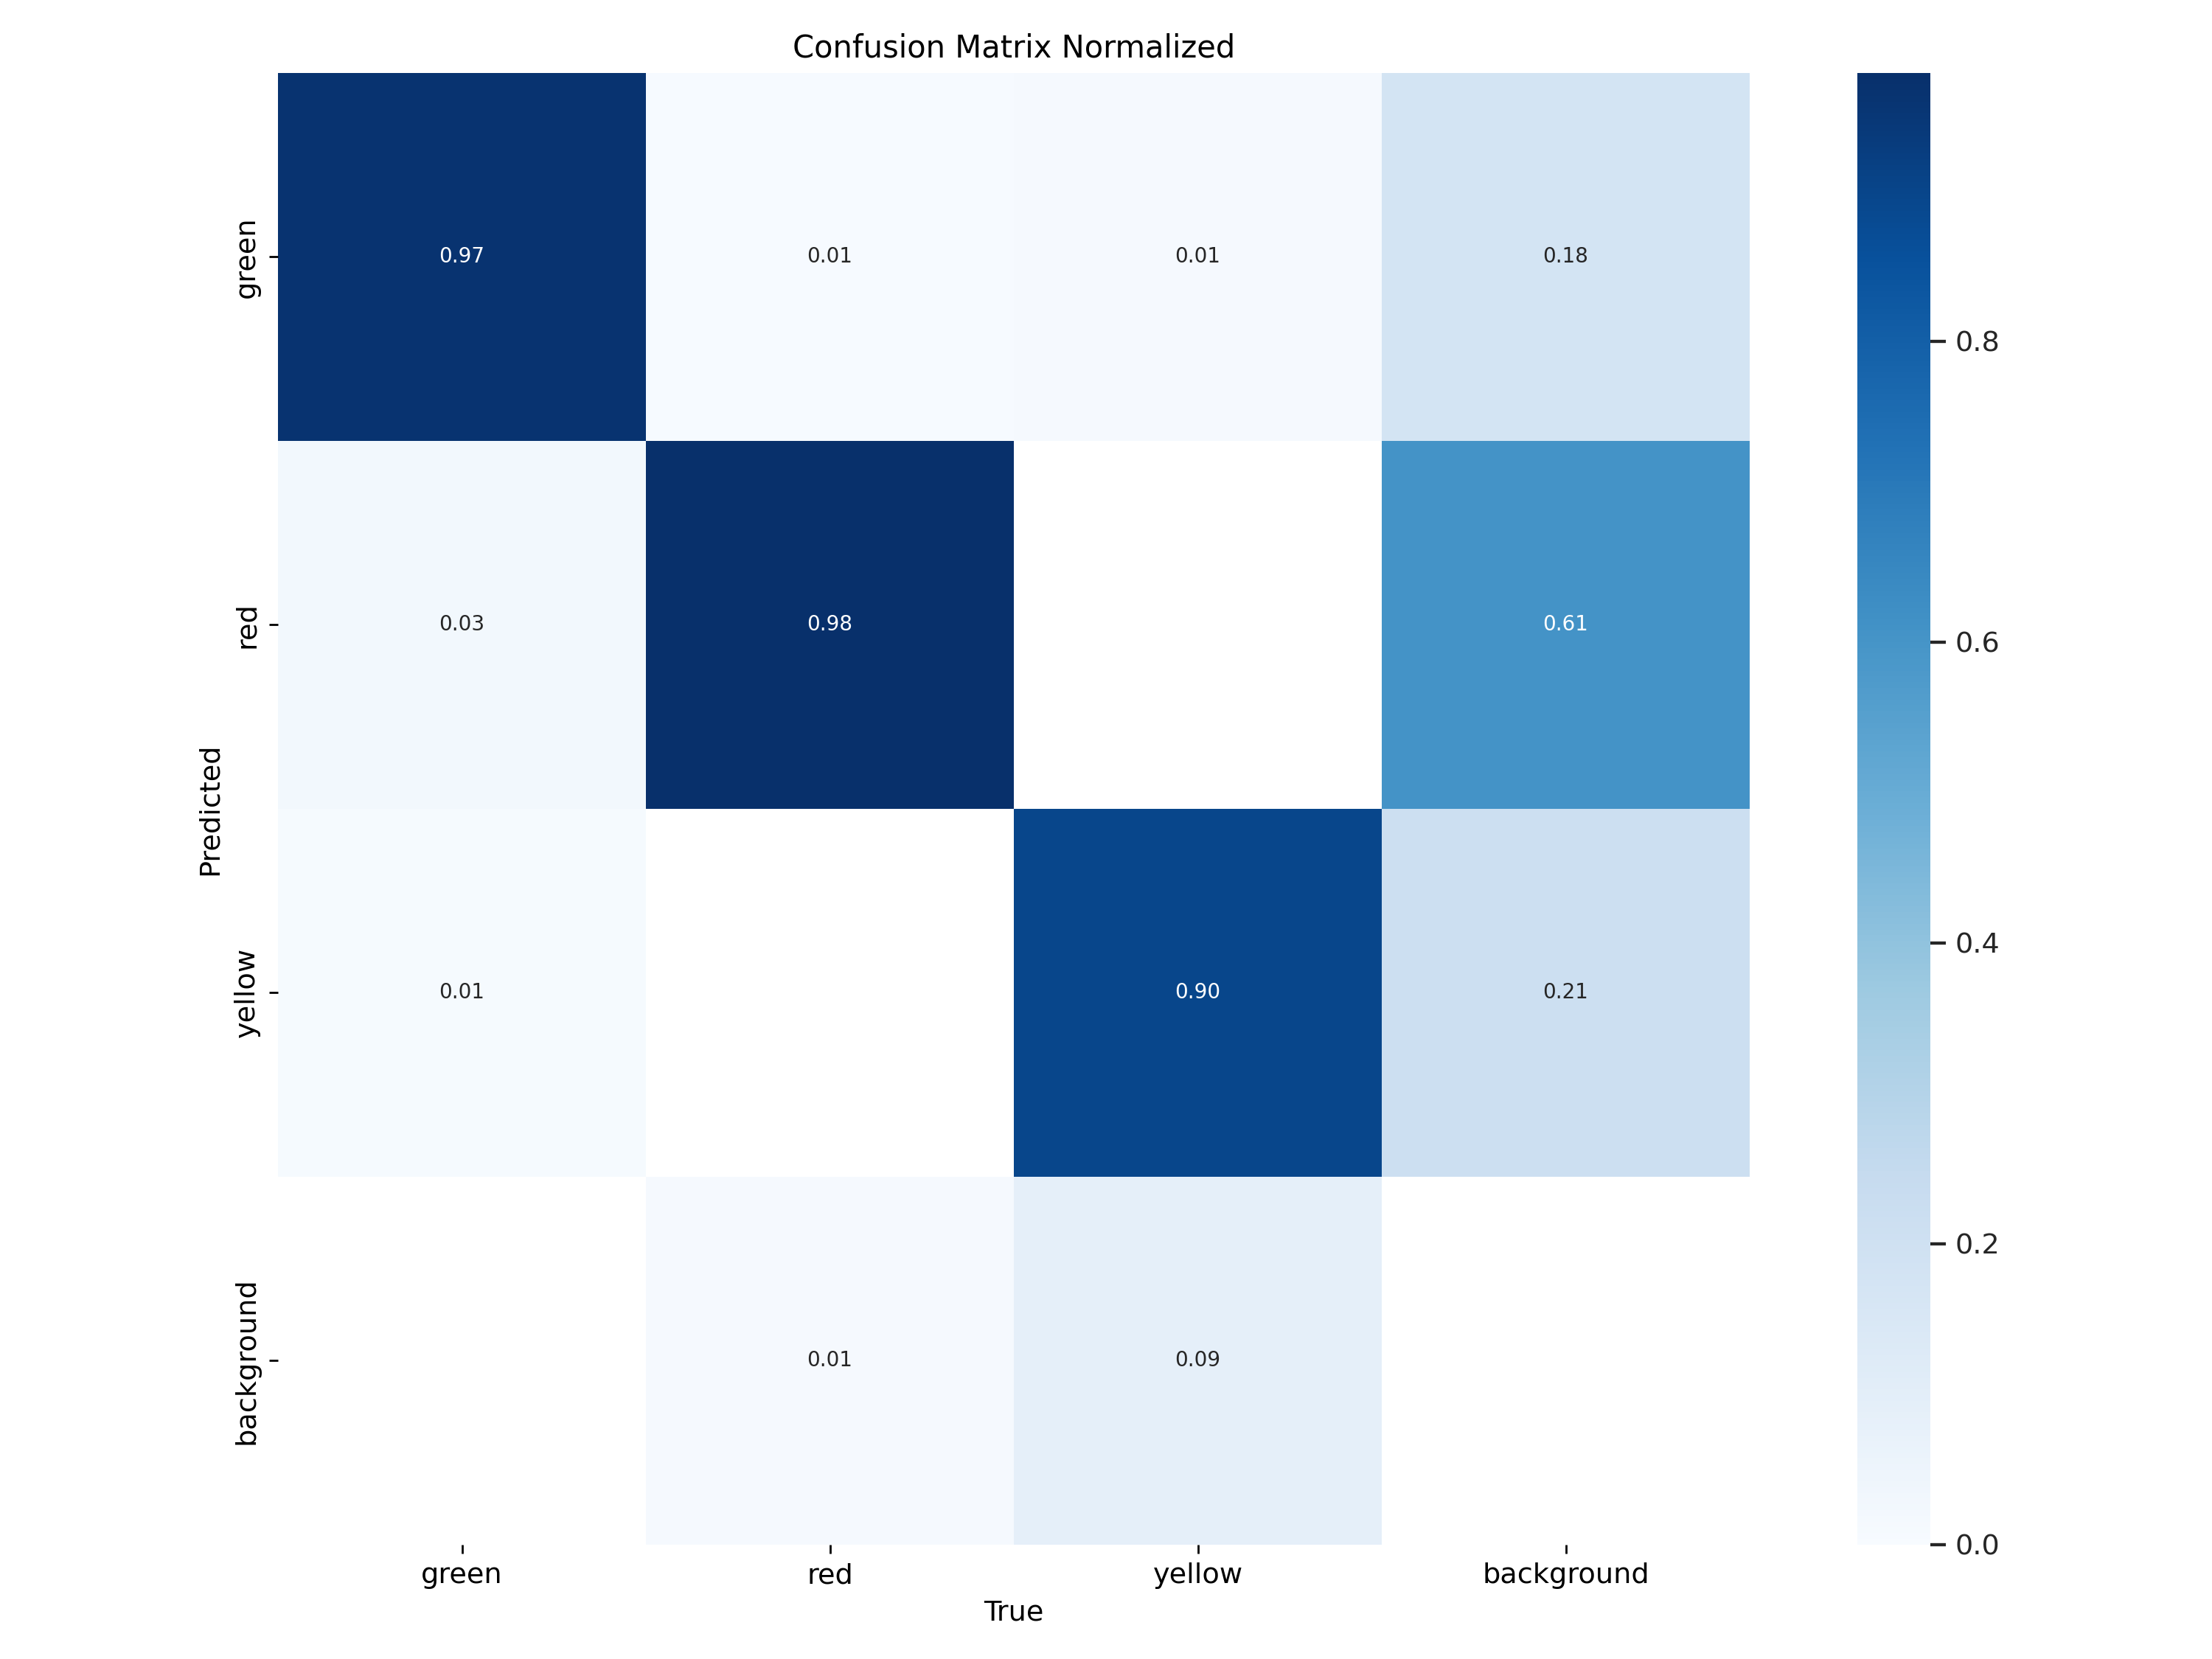

In [15]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix_normalized.png', width=900)

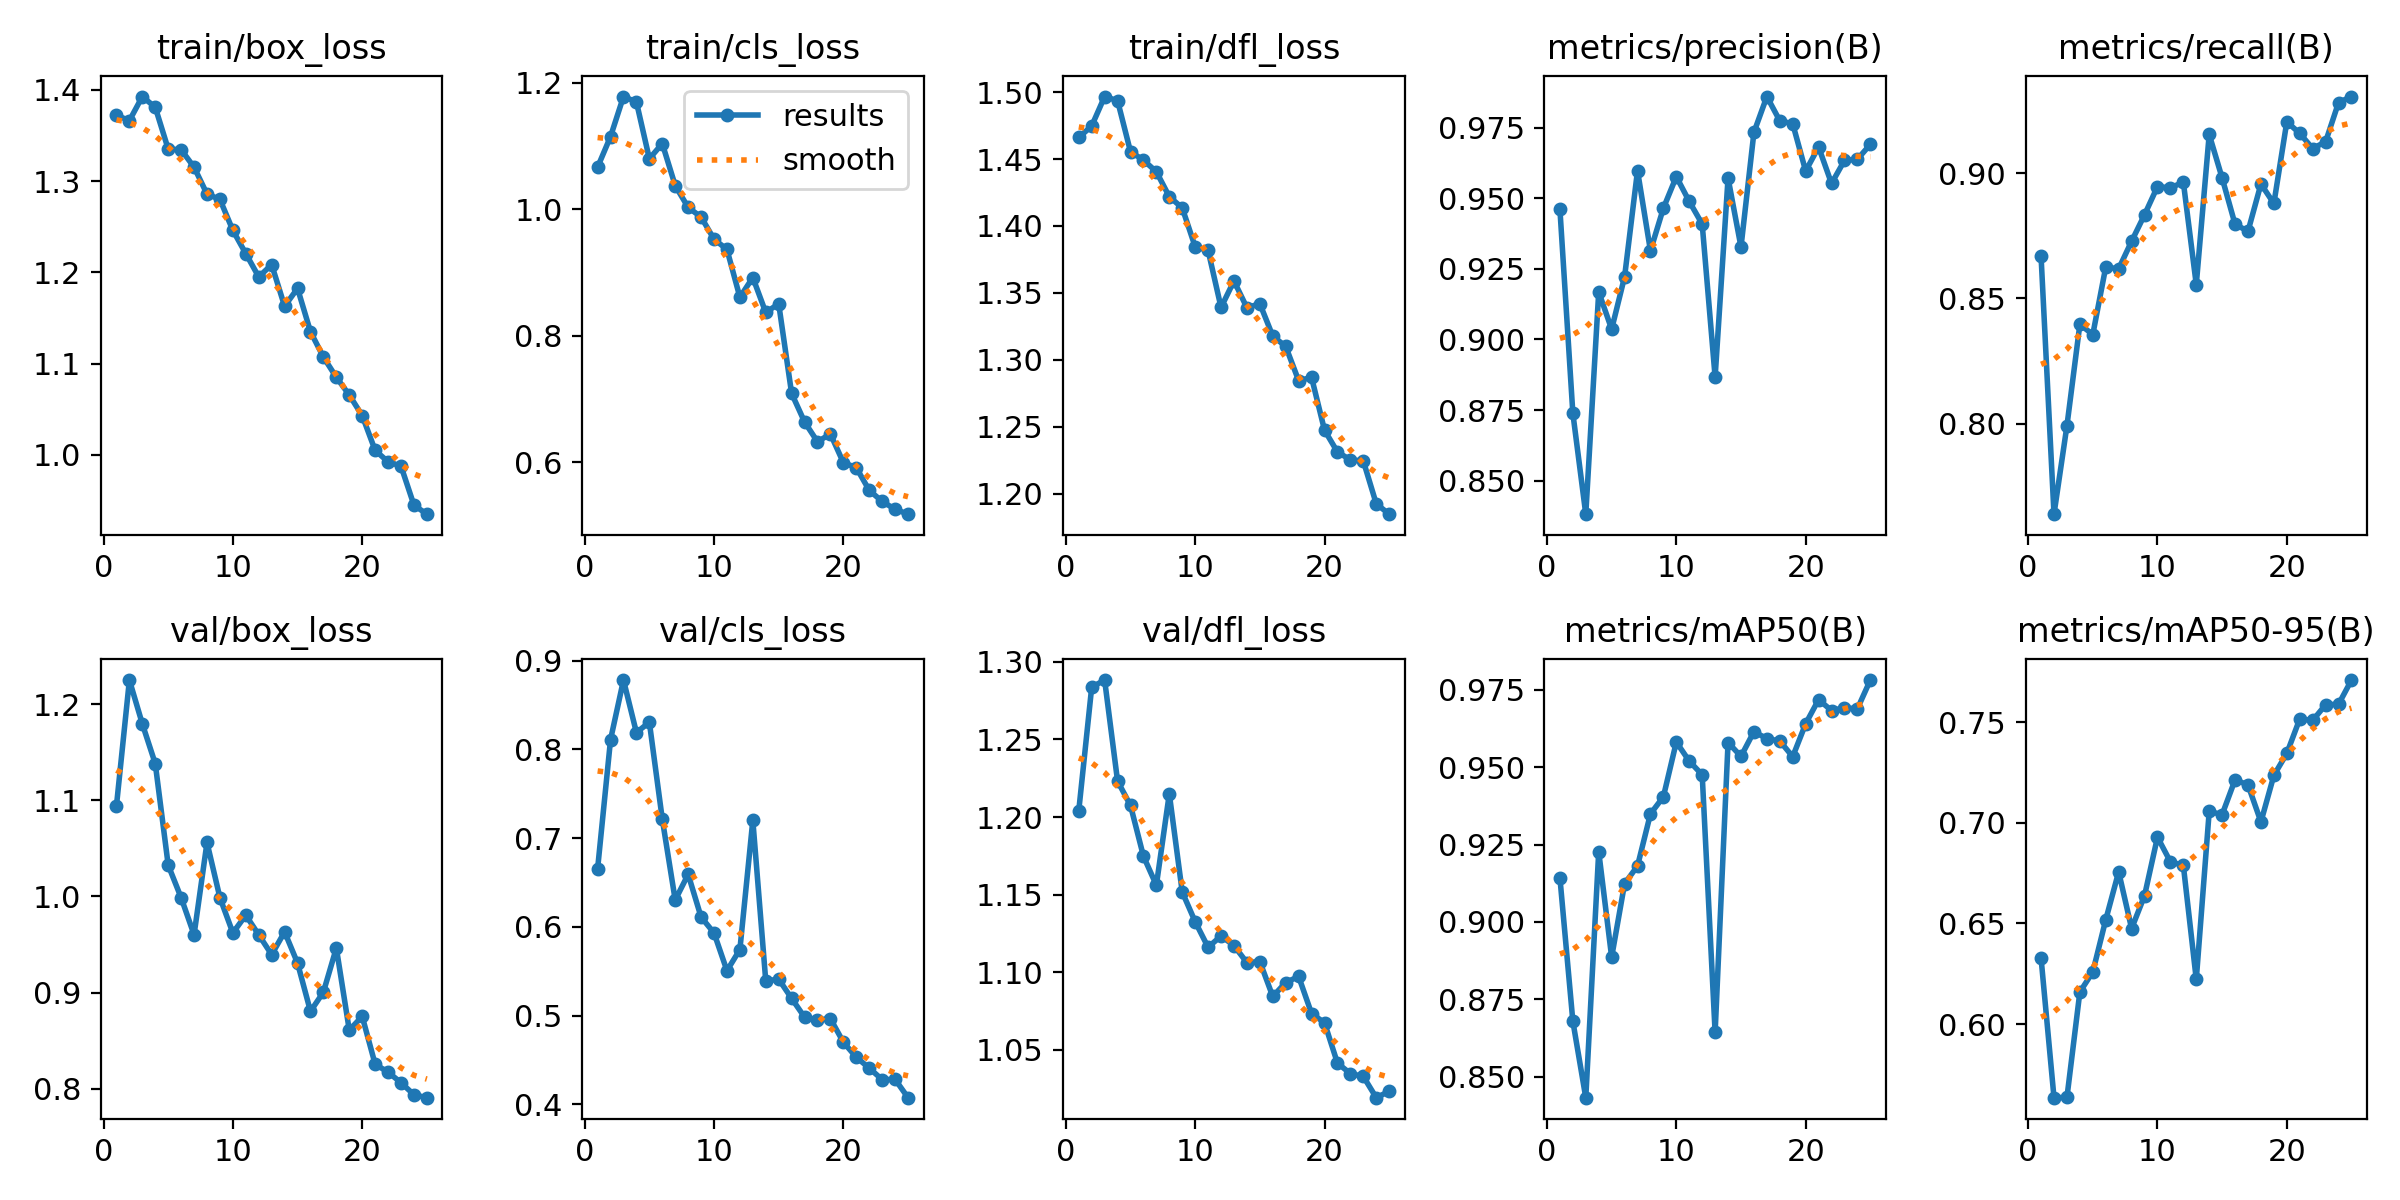

In [16]:
Image(filename=f'/content/runs/detect/train3/results.png', width=900)

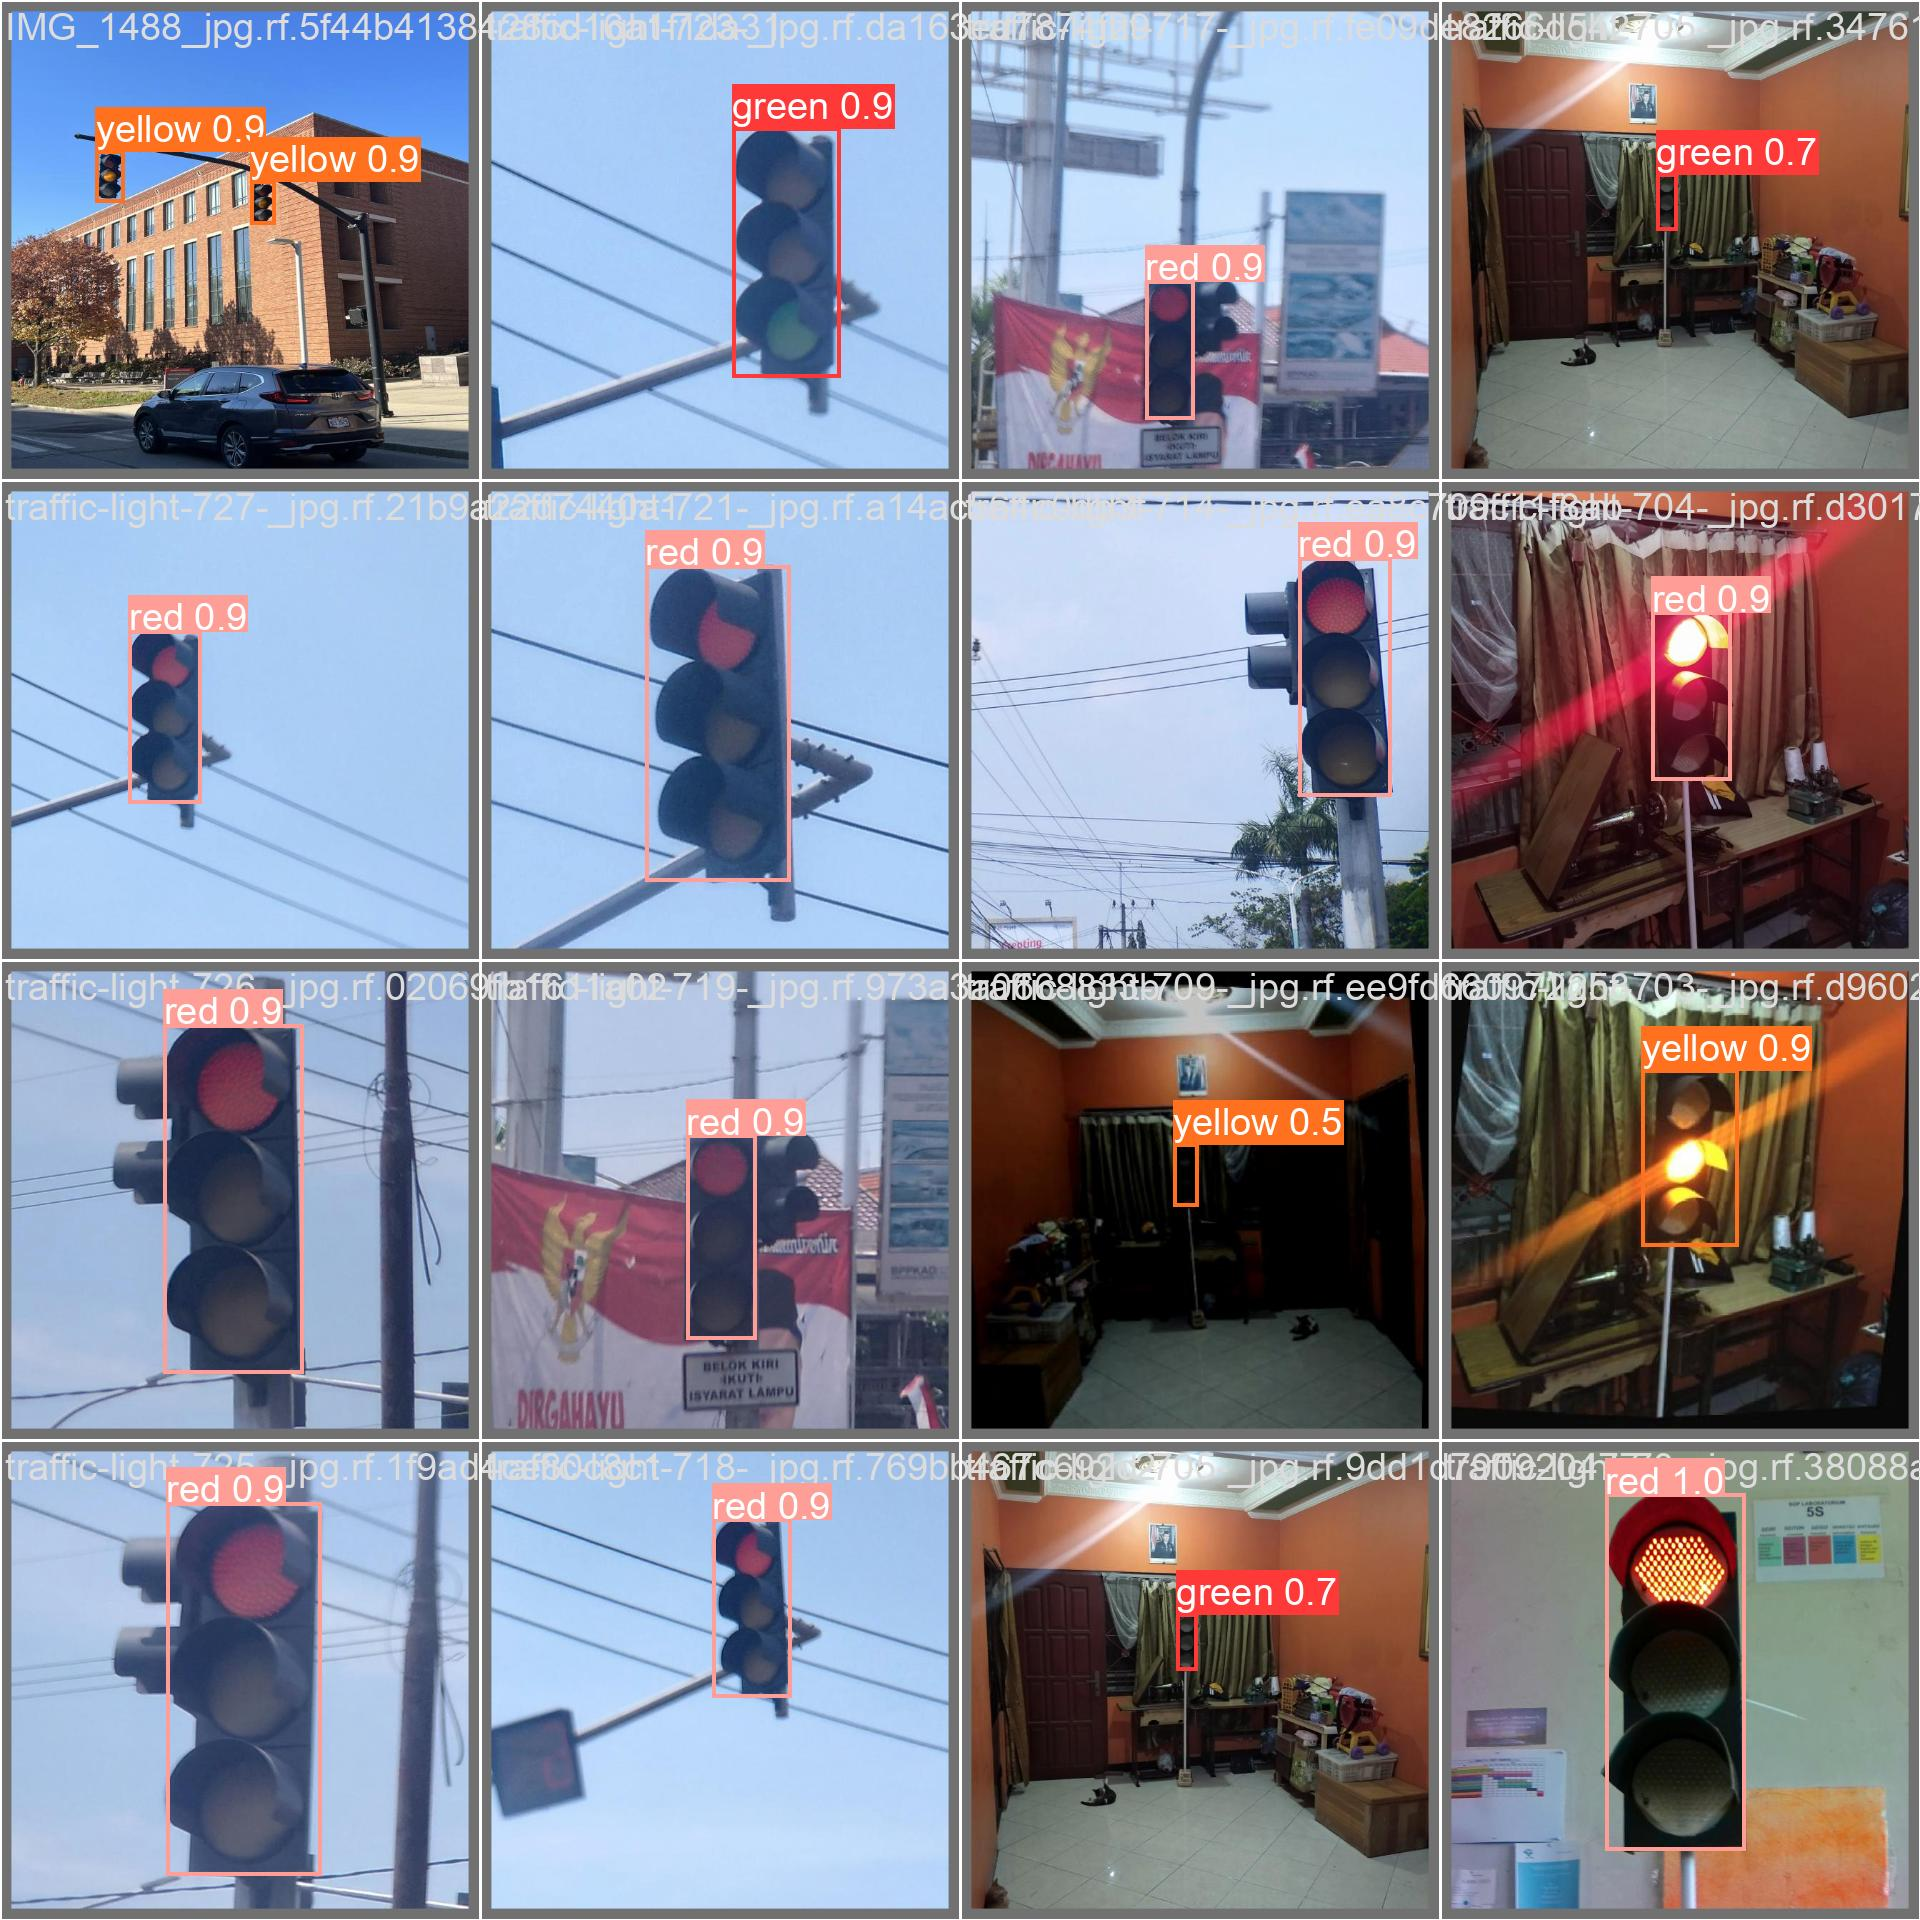

In [17]:
Image(filename=f'/content/runs/detect/train3/val_batch0_pred.jpg', width=600)

# Validate Custom Model

In [20]:
!yolo task=detect mode=val model='/content/runs/detect/train3/weights/best.pt' data = '/content/traffic-light-25/data.yaml'

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/traffic-light-25/valid/labels.cache... 495 images, 0 backgrounds, 0 corrupt: 100% 495/495 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:23<00:00,  1.32it/s]
                   all        495        695       0.97       0.93      0.978      0.769
                 green        495        116      0.982      0.955      0.987      0.826
                   red        495        512      0.977      0.971      0.992      0.794
                yellow        495         67       0.95      0.866      0.956      0.688
Speed: 2.3ms preprocess, 34.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with Custom Model

In [21]:
!yolo task=detect mode=predict model='/content/runs/detect/train3/weights/best.pt' source='/content/traffic-light-25/test/images'

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

image 1/264 /content/traffic-light-25/test/images/IMG_1481_jpg.rf.e3665dff27554a16746332d922358ea0.jpg: 640x640 2 yellows, 62.8ms
image 2/264 /content/traffic-light-25/test/images/IMG_1501_jpg.rf.eb9dc1138e330608efde83e7fa586fcc.jpg: 640x640 2 yellows, 62.8ms
image 3/264 /content/traffic-light-25/test/images/IMG_1554_JPG.rf.b936acf487a26425093895539aa431f7.jpg: 640x640 3 yellows, 62.7ms
image 4/264 /content/traffic-light-25/test/images/IMG_8457_jpeg.rf.030f8b8ab39e9ca035d4e89bb090fc66.jpg: 640x640 1 red, 62.8ms
image 5/264 /content/traffic-light-25/test/images/predictions_jpg.rf.b8f5dc847a319f43f963d48b4f20d32e.jpg: 640x640 2 reds, 47.8ms
image 6/264 /content/traffic-light-25/test/images/traffic-light-101-_jpg.rf.d0f9c1a11e9da455868d09c4066ff480.jpg: 640x640 1 yellow, 38.2ms
image 7/264 /content/traffic-light-25/test/

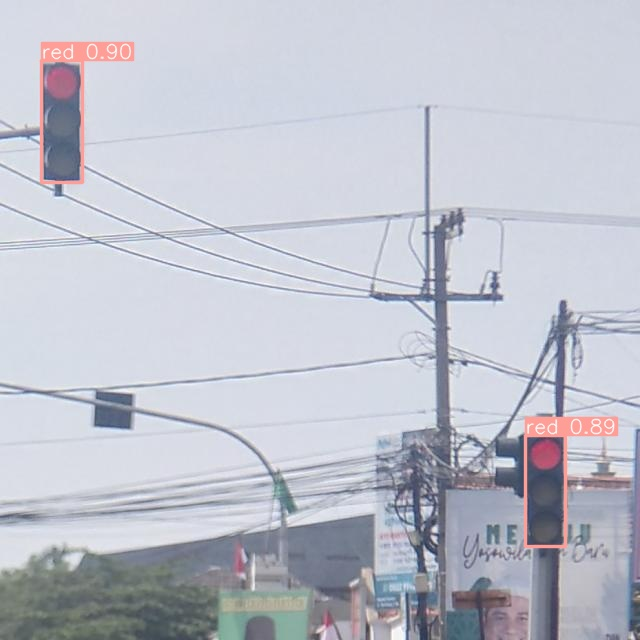

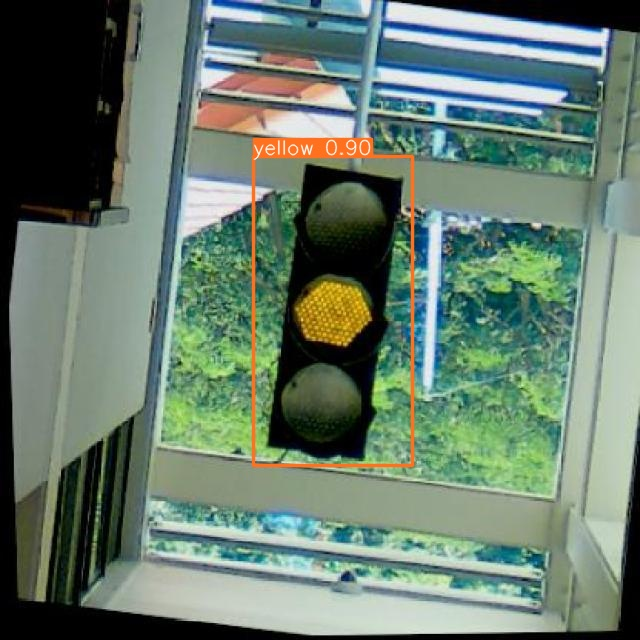

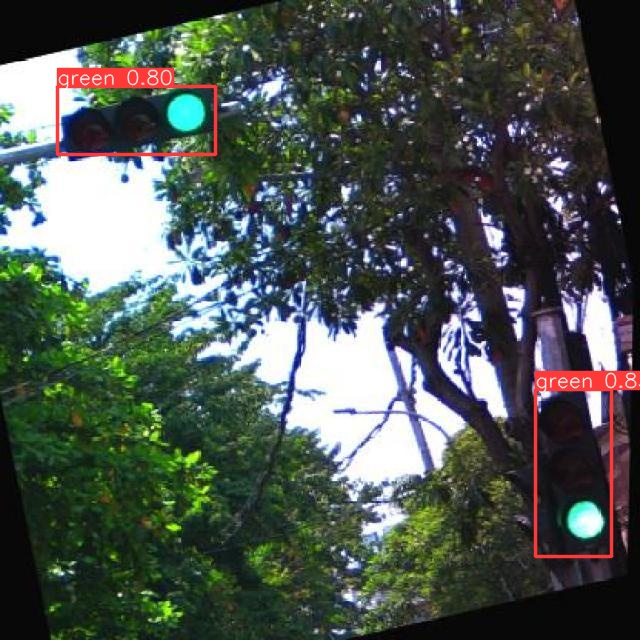

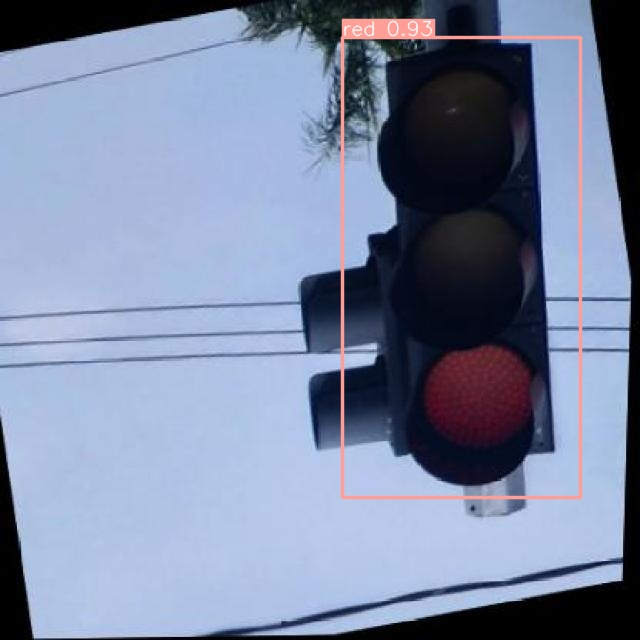

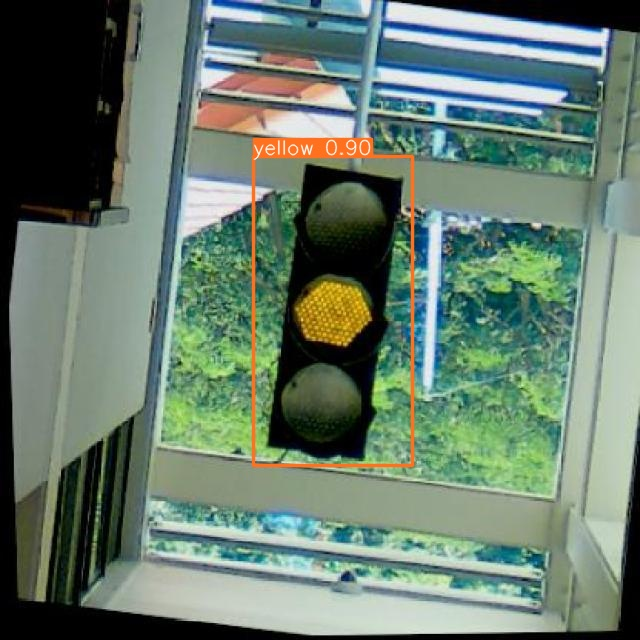

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
  display(Image(filename=image_path, width=600))
  print("\n")

# Testing on a demo video

In [23]:
# download a demo video0
!gdown "https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t
To: /content/video1.mp4
100% 4.50M/4.50M [00:00<00:00, 266MB/s]


In [24]:
# download a demo video1
!gdown "https://drive.google.com/uc?id=1lVMrMZ3TMoNKfe6PYAzOBaZiYwQ2tna9"

Downloading...
From: https://drive.google.com/uc?id=1lVMrMZ3TMoNKfe6PYAzOBaZiYwQ2tna9
To: /content/demo_driver-view.mp4
100% 10.2M/10.2M [00:00<00:00, 49.5MB/s]


In [25]:
# download a demo video2
!gdown "https://drive.google.com/uc?id=1b8Um9VBfTOJpYcMqfwxqis-mVB_dQccI"

Downloading...
From: https://drive.google.com/uc?id=1b8Um9VBfTOJpYcMqfwxqis-mVB_dQccI
To: /content/demo_driver-view2.mp4
100% 39.2M/39.2M [00:01<00:00, 39.2MB/s]


In [26]:
# download a demo video3
!gdown "https://drive.google.com/uc?id=1ZQhqBM19VUzffOkj8OG0wNAwT1RyWlBR"

Downloading...
From: https://drive.google.com/uc?id=1ZQhqBM19VUzffOkj8OG0wNAwT1RyWlBR
To: /content/demo_driver-view3.mp4
100% 44.4M/44.4M [00:00<00:00, 55.5MB/s]


In [27]:
# download a demo video4
!gdown "https://drive.google.com/uc?id=1KU9yO4LOJBt6_QtpWbzjvxAOvjD53hiB"

Downloading...
From: https://drive.google.com/uc?id=1KU9yO4LOJBt6_QtpWbzjvxAOvjD53hiB
To: /content/demo_driver-view4.mp4
100% 2.50M/2.50M [00:00<00:00, 221MB/s]


In [28]:
# download a demo video5 (static)
!gdown "https://drive.google.com/uc?id=1CSxJdxiwkWWnprBL9mXEgxvUiyY_Y5Z-"

Downloading...
From: https://drive.google.com/uc?id=1CSxJdxiwkWWnprBL9mXEgxvUiyY_Y5Z-
To: /content/demo_driver-view-static.mp4
100% 2.83M/2.83M [00:00<00:00, 216MB/s]


In [29]:
!gdown "https://drive.google.com/uc?id=1O-nN6Gu0wBWhqPiJ2m5-Y2bBZbvTBrux"

Downloading...
From: https://drive.google.com/uc?id=1O-nN6Gu0wBWhqPiJ2m5-Y2bBZbvTBrux
To: /content/demo-img2.jpg
100% 79.2k/79.2k [00:00<00:00, 82.7MB/s]


In [30]:
!gdown "https://drive.google.com/uc?id=1Oa2Qgvg2IlYJVHqVywEIE_4FUs_ZrKQS"

Downloading...
From: https://drive.google.com/uc?id=1Oa2Qgvg2IlYJVHqVywEIE_4FUs_ZrKQS
To: /content/demo-img3.jpg
100% 174k/174k [00:00<00:00, 103MB/s]


In [31]:
!gdown "https://drive.google.com/uc?id=1I408SwBeELwRw5kLFoKLY0_eNbHNgppP"

Downloading...
From: https://drive.google.com/uc?id=1I408SwBeELwRw5kLFoKLY0_eNbHNgppP
To: /content/demo-img4.jpg
100% 117k/117k [00:00<00:00, 97.6MB/s]


In [32]:
!gdown "https://drive.google.com/uc?id=1tqcPDtUgK18IzUZxu50v1KqiGMSFSPRw"

Downloading...
From: https://drive.google.com/uc?id=1tqcPDtUgK18IzUZxu50v1KqiGMSFSPRw
To: /content/demo-img5.jpg
100% 144k/144k [00:00<00:00, 96.5MB/s]


In [34]:

!yolo task=detect mode=predict model='/content/runs/detect/train3/weights/best.pt' source='/content/*.mp4'

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/6 (1/271) /content/demo_driver-view-static.mp4: 384x640 3 reds, 122.8ms
video 1/6 (2/271) /content/demo_driver-view-static.mp4: 384x640 4 reds, 40.8ms
video 1/6 (3/271) /content/demo_driver-view-static.mp4: 384x640 3 reds, 39.5ms
video 1/6 (4/271) /content/demo_driver-view-static.mp4: 384x640 4 reds, 39.5ms
video 1/6 (5/271) /content/demo_driver-view-static.mp4: 384x640 5 reds, 39.5ms
video 1/6 (6/271) /content/demo_driver-view-static.mp4: 384x640 4 reds, 31.5ms
video 1/6 (7/271) /content/demo_driver-view-static.mp4: 384x640 4 reds, 31.5ms
video 1/6 (8/271) /content/demo_driver-view-static.mp4: 384x640 4 reds, 38.0ms
video 1/6 (9/271) /content/demo_driver-view-static.mp4: 384x640 3 reds, 31.6ms
video 1/6 (10/271) /content/demo_driver-view-static.mp4: 384x640 3 reds, 55

In [36]:
!yolo task=detect mode=predict model='/content/runs/detect/train3/weights/best.pt' source='/content/*.jpg'

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/4 /content/demo-img2.jpg: 384x640 3 greens, 225.1ms
image 2/4 /content/demo-img3.jpg: 384x640 1 green, 2 reds, 39.5ms
image 3/4 /content/demo-img4.jpg: 448x640 1 yellow, 72.3ms
image 4/4 /content/demo-img5.jpg: 480x640 3 reds, 83.4ms
Speed: 5.1ms preprocess, 105.1ms inference, 168.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [39]:
# download the inference prediction output folder for reference
import shutil
from google.colab import files

# Specify the path to the folder you want to download
folder_path = '/content/runs/detect/predict2'

# Specify the path for the zip file
zip_file_path = '/content/TD2_inference_vid.zip'

# Create a zip archive of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

# Use files.download to trigger the download of the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# download the inference prediction output folder for reference
import shutil
from google.colab import files

# Specify the path to the folder you want to download
folder_path = '/content/runs/detect/predict'

# Specify the path for the zip file
zip_file_path = '/content/TD2_inference_testset.zip'

# Create a zip archive of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

# Use files.download to trigger the download of the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
#download trained model folder

# Specify the path to the folder you want to download
folder_path = '/content/runs/detect/train3'

# Specify the path for the zip file
zip_file_path = '/content/TD2_train3.zip'

# Create a zip archive of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

# Use files.download to trigger the download of the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# download validation folder
# Specify the path to the folder you want to download
folder_path = '/content/runs/detect/val3'

# Specify the path for the zip file
zip_file_path = '/content/TD2_val3.zip'

# Create a zip archive of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

# Use files.download to trigger the download of the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Export the model

In [ ]:
# Load a model
model = YOLO('yolov8l.pt')  # load an official model
model = YOLO('/content/runs/detect/train3/weights/best.pt)  # load a custom trained model

# Export the model
model.export(format='onnx')
model.export(format='engine')
model.export(format='openvino')